In [12]:
import pandas as pd
from scipy.stats import norm
from datetime import date
import math
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from arch import arch_model

In [14]:
import yfinance as yf

In [61]:
"""data_option = yf.download("^GSPC", start="2016-03-01", end="2018-03-02")
data_option['pct_change'] = data_option.Open.pct_change()
data_option['log_ret'] = np.log(data_option.Open) - np.log(data_option.Open.shift(1))"""

'data_option = yf.download("^GSPC", start="2016-03-01", end="2018-03-02")\ndata_option[\'pct_change\'] = data_option.Open.pct_change()\ndata_option[\'log_ret\'] = np.log(data_option.Open) - np.log(data_option.Open.shift(1))'

In [16]:
#data

In [17]:
data = yf.download("^GSPC", start="2005-03-01", end="2016-03-01")

[*********************100%***********************]  1 of 1 completed


In [18]:
data['pct_change'] = data.Open.pct_change()

In [19]:
data['log_ret'] = np.log(data.Open) - np.log(data.Open.shift(1))

In [20]:
data["log_ret"].std()

0.012062676410980393

In [21]:
data['log_ret * 100'] = data['log_ret'] * 100

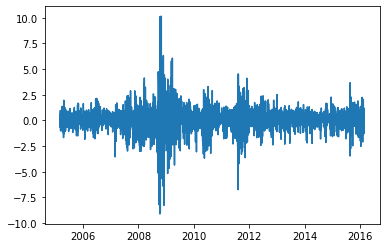

In [22]:
plt.plot(data['log_ret * 100'])

In [23]:
am = arch_model(data['log_ret * 100'][1:,], vol='Garch', p=1, o=0, q=1, dist='Normal', mean= "Zero")

In [24]:
#help(arch_model)

In [25]:
print(am)
res = am.fit()
print(res.summary())

Zero Mean(constant: no, no. of exog: 0, volatility: GARCH(p: 1, q: 1), distribution: Normal distribution)
Iteration:      1,   Func. Count:      5,   Neg. LLF: 1288419213.2814631
Iteration:      2,   Func. Count:     11,   Neg. LLF: 5709.351318292893
Iteration:      3,   Func. Count:     17,   Neg. LLF: 3745.079994533143
Iteration:      4,   Func. Count:     22,   Neg. LLF: 3730.406142939734
Iteration:      5,   Func. Count:     27,   Neg. LLF: 3696.8041262277193
Iteration:      6,   Func. Count:     32,   Neg. LLF: 3696.128791908269
Iteration:      7,   Func. Count:     37,   Neg. LLF: 3696.0254965834047
Iteration:      8,   Func. Count:     41,   Neg. LLF: 3696.0254453515745
Iteration:      9,   Func. Count:     44,   Neg. LLF: 3696.0254453506377
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3696.0254453515745
            Iterations: 9
            Function evaluations: 44
            Gradient evaluations: 9
                       Zero Mean 

In [26]:
res.params

omega       0.019849
alpha[1]    0.100266
beta[1]     0.881597
Name: params, dtype: float64

In [27]:
data = data.dropna()

In [28]:
data

,Open,High,Low,Close,Adj Close,Volume,pct_change,log_ret,log_ret * 100
Date,,,,,,,,,
2005-03-01,1203.599976,1212.250000,1203.599976,1210.410034,1210.410034,1708060000,-0.006414,-0.006435,-0.643490
2005-03-02,1210.410034,1215.790039,1204.219971,1210.079956,1210.079956,1568540000,0.005658,0.005642,0.564213
2005-03-03,1210.079956,1215.719971,1204.449951,1210.469971,1210.469971,1616240000,-0.000273,-0.000273,-0.027274
2005-03-04,1210.469971,1224.760010,1210.469971,1222.119995,1222.119995,1636820000,0.000322,0.000322,0.032225
2005-03-07,1222.119995,1229.109985,1222.119995,1225.310059,1225.310059,1488830000,0.009624,0.009578,0.957836
...,...,...,...,...,...,...,...,...,...
2016-02-23,1942.380005,1942.380005,1919.439941,1921.270020,1921.270020,3890650000,0.009322,0.009279,0.927904
2016-02-24,1917.560059,1932.079956,1891.000000,1929.800049,1929.800049,4317250000,-0.012778,-0.012860,-1.286045
2016-02-25,1931.869995,1951.829956,1925.410034,1951.699951,1951.699951,4118210000,0.007463,0.007435,0.743487


In [29]:
data.to_csv("Daten/sp500.csv", index=False)

In [30]:
data.iloc[:,8]

Date
2005-03-01   -0.643490
2005-03-02    0.564213
2005-03-03   -0.027274
2005-03-04    0.032225
2005-03-07    0.957836
                ...   
2016-02-23    0.927904
2016-02-24   -1.286045
2016-02-25    0.743487
2016-02-26    1.187615
2016-02-29   -0.400810
Name: log_ret * 100, Length: 2769, dtype: float64

In [31]:
def rtfunc(sigmat2):
    zt = np.random.normal(0,1,1)[0]
    return sigmat2**0.5 * zt

In [32]:
def sigmat2func(omega, alpha, beta, rtm1, sigmat2m1):
    return omega+alpha*rtm1+beta*sigmat2m1

In [33]:
def mttp1func(sigmat2p1, rtp1, rcons):
    thetatp1 = rcons/sigmat2p1 - 0.5
    nom = np.exp(thetatp1*rtp1)
    denom = np.exp(0.5 * (1+thetatp1)**2 * sigmat2p1 )
    return nom/denom

In [34]:
rtm1 =data["log_ret * 100"][-1]

In [35]:
omega = 0.02
alpha = 0.1
beta = 0.88

In [36]:
sigmat2m1 = rtm1**2

In [37]:
np.random.seed(1)

In [38]:
#sigmat2 = sigmat2(omega, alpha, beta, rtm1, sigmat2m1)

In [39]:
#print(rt(sigmat2**0.5))

In [40]:
omega = 0.02
alpha = 0.1
beta = 0.88
rcons = 0.007

In [41]:
T = 27
t = 10

In [42]:
data["log_ret"][1]

0.005642127938093822

In [43]:
data_option

,Open,High,Low,Close,Adj Close,Volume,pct_change,log_ret
Date,,,,,,,,
2016-02-29,1947.130005,1958.270020,1931.810059,1932.229980,1932.229980,4588180000,NaN,NaN
2016-03-01,1937.089966,1978.349976,1937.089966,1978.349976,1978.349976,4819750000,-0.005156,-0.005170
2016-03-02,1976.599976,1986.510010,1968.800049,1986.449951,1986.449951,4666610000,0.020397,0.020191
2016-03-03,1985.599976,1993.689941,1977.369995,1993.400024,1993.400024,5081700000,0.004553,0.004543
2016-03-04,1994.010010,2009.130005,1986.770020,1999.989990,1999.989990,6049930000,0.004236,0.004227
...,...,...,...,...,...,...,...,...
2018-02-23,2715.800049,2747.760010,2713.739990,2747.300049,2747.300049,3189190000,0.001985,0.001983
2018-02-26,2757.370117,2780.639893,2753.780029,2779.600098,2779.600098,3424650000,0.015307,0.015191
2018-02-27,2780.449951,2789.149902,2744.219971,2744.280029,2744.280029,3745080000,0.008370,0.008335


In [46]:
rtm1 =data_option["log_ret"][1]
sigmat2m1 = rtm1**2
mysigmas = []
myrs = []
m_list = []
for i in range(T-t+1):
    sigmat2 = sigmat2func(omega, alpha, beta, rtm1, sigmat2m1)
    rt = rtfunc(sigmat2)
    mtm1t = mttp1func(sigmat2, rt, rcons)
    mysigmas.append(sigmat2)
    myrs.append(rt)
    m_list.append(mtm1t)
    rtm1 = rt
    sigmat2m1 = sigmat2

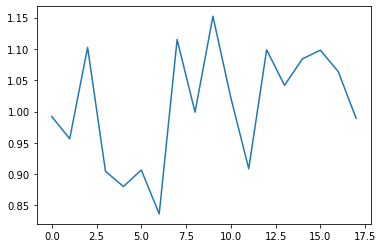

In [47]:
mtT = np.array(m_list)
plt.plot(m_list)

In [48]:
np.product(mtT)

1.079686780543411

In [49]:
SThat = 1985*np.exp(np.sum(myrs))

In [50]:
SThat

898.2442100301379

In [51]:
def callP(mtT, SThat, K):
    return np.product(mtT)*max([SThat-K,0])
    

In [52]:
callp = np.product(mtT)*SThat

In [53]:
callp

969.822399269199

In [54]:
np.mean(m_list)

1.0084203045584252

In [55]:
callP(mtT,SThat,100)

861.853721214858

In [56]:
def sim_option_price_sdf(series, S_t, K, horizon, par, draws, r, model):
    if model == "GARCH":
        omega = par[0]/100**2
        alpha = par[1]
        beta = par[2]
    S_T = np.zeros(draws)
    temp = np.zeros(draws)

    #sigma2 = np.zeros(len(series))
    #sigma2[0] = np.var(series)
    #print(sigma2)
    #for i in range(len(series)):
    #    sigma2[i] = omega + alpha*series[i-1]**2 + beta*sigma2[i-1]
    #print(sigma2)                                                    
    for i in range(draws):
        ret = np.zeros(horizon)
        theta = np.zeros(horizon)
        sdf = np.zeros(horizon)    
        s = np.var(series) #sigma2[-1]
        s =  omega + alpha*series[-1]**2 + beta*s
            
        for j in range(horizon):
            theta[j] = r/s - 1/2
            ret[j] = (s)**0.5 * np.random.normal(0,1,1)[0]
            sdf[j] = np.exp(theta[j]*ret[j])/np.exp( (1+theta[j])**2 * s/2)
            s = omega + alpha*ret[j]**2 + beta*s
        
        rsum = np.sum(ret)
        S_T[i] = S_t * np.exp(rsum)
        prodsdf = np.product(sdf)
        temp[i] = prodsdf * (S_T[i]-K)*(S_T[i]>K)
        #print(temp)
    return np.mean(temp)#, np.var(temp)**0.5

In [57]:
sim_option_price_sdf(series = data["log_ret"], S_t = 1990.2, K = 1950, horizon = 21, par = np.array([0.02,0.1,0.87]), draws = 10000, r = 0.003/251, model = "GARCH" )

61.193542469340926

In [ ]:
np.var(data["log_ret"])

0.00014545561320281373

In [62]:
data_option

,Open,High,Low,Close,Adj Close,Volume,pct_change,log_ret
Date,,,,,,,,
2016-02-29,1947.130005,1958.270020,1931.810059,1932.229980,1932.229980,4588180000,NaN,NaN
2016-03-01,1937.089966,1978.349976,1937.089966,1978.349976,1978.349976,4819750000,-0.005156,-0.005170
2016-03-02,1976.599976,1986.510010,1968.800049,1986.449951,1986.449951,4666610000,0.020397,0.020191
2016-03-03,1985.599976,1993.689941,1977.369995,1993.400024,1993.400024,5081700000,0.004553,0.004543
2016-03-04,1994.010010,2009.130005,1986.770020,1999.989990,1999.989990,6049930000,0.004236,0.004227
...,...,...,...,...,...,...,...,...
2018-02-23,2715.800049,2747.760010,2713.739990,2747.300049,2747.300049,3189190000,0.001985,0.001983
2018-02-26,2757.370117,2780.639893,2753.780029,2779.600098,2779.600098,3424650000,0.015307,0.015191
2018-02-27,2780.449951,2789.149902,2744.219971,2744.280029,2744.280029,3745080000,0.008370,0.008335
